## Setup

In [0]:
pip install tweepy

## Tweepy Setup

In [0]:
import tweepy

auth = tweepy.OAuthHandler("SY7YdroSjyzecDHWQ1ZwY8fMn", "LMAvuCNIqQdl9H1pKgnXYO9axZlI9PHkNNOecbyaeS6LL6aJjc")
auth.set_access_token("806960801357570048-FBXdDXjRlVICNU5F6mS7tyVZBW6ozLT", "ya6bqSBtR8lvBfvfeZtKtgySw08c1RwHnLUFVd9ZLzEx5")

api = tweepy.API(auth, wait_on_rate_limit=False)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm
%matplotlib inline

import datetime
import re

## Fetch Top Trends in India

In [0]:
INDIA_WOE_ID = 23424848
x= api.trends_place (id=INDIA_WOE_ID)
print(len(x[0]['trends']))
trendsOfTheDay = x[0]['trends']

37


Now we have top 50 trending hashtags on twitter in India for today

Trend Object

In [0]:
trendsOfTheDay[0]

{'name': '#HappyBirthdayRaina',
 'promoted_content': None,
 'query': '%23HappyBirthdayRaina',
 'tweet_volume': 96138,
 'url': 'http://twitter.com/search?q=%23HappyBirthdayRaina'}

Structuring Trend Data

In [0]:
trendyColumns = ['name','tweet_volume','query']
trendsDF = pd.DataFrame(columns=trendyColumns)
for i in range(len(trendsOfTheDay)):
  trendsDF.loc[i] = [trendsOfTheDay[i]['name'],trendsOfTheDay[i]['tweet_volume'],trendsOfTheDay[i]['query']]
trendsDF

,name,tweet_volume,query
0,#HappyBirthdayRaina,96138,%23HappyBirthdayRaina
1,#GodMorningWednesday,34117,%23GodMorningWednesday
2,#ISRO,None,%23ISRO
3,#HBDUdhayanidhiStalin,None,%23HBDUdhayanidhiStalin
4,#MaharashtraKaMahaDrama,None,%23MaharashtraKaMahaDrama
5,Satish Dhawan Space Centre,None,%22Satish+Dhawan+Space+Centre%22
6,Mudra,None,Mudra
7,SGX Nifty,None,%22SGX+Nifty%22
8,From Today,27838,%22From+Today%22
9,श्री गणेश,None,%22%E0%A4%B6%E0%A5%8D%E0%A4%B0%E0%A5%80+%E0%A4...


## Preliminary Trend Analysis and Visualisation

Removed Non-english hashtags and the hashtag prefix

In [0]:
trendsDF['name'] = trendsDF['name'].apply(lambda x: x if(x[0]=="#") else "#"+x)
trendsDF['name'] = trendsDF['name'].apply(lambda x: x[1:] if((ord(x[1])>=65 and ord(x[1])<=91) or (ord(x[1])>=97 and ord(x[1])<=122)) else None)
trendsDF

,name,tweet_volume,query
0,HappyBirthdayRaina,96138,%23HappyBirthdayRaina
1,GodMorningWednesday,34117,%23GodMorningWednesday
2,ISRO,None,%23ISRO
3,HBDUdhayanidhiStalin,None,%23HBDUdhayanidhiStalin
4,MaharashtraKaMahaDrama,None,%23MaharashtraKaMahaDrama
5,Satish Dhawan Space Centre,None,%22Satish+Dhawan+Space+Centre%22
6,Mudra,None,Mudra
7,SGX Nifty,None,%22SGX+Nifty%22
8,From Today,27838,%22From+Today%22
9,None,None,%22%E0%A4%B6%E0%A5%8D%E0%A4%B0%E0%A5%80+%E0%A4...


Removing Non-English named rows

In [0]:
trendsDF = trendsDF[trendsDF['name'].isnull()==False]
trendsDF.shape

(32, 3)

<BarContainer object of 16 artists>

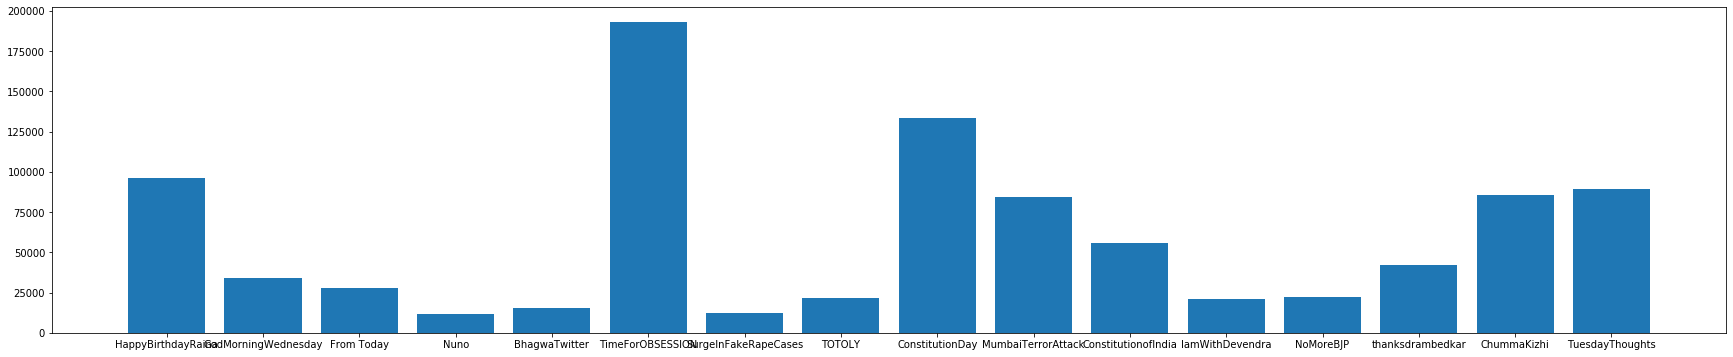

In [0]:
barVisualTrends = trendsDF[trendsDF['tweet_volume'].isnull()==False]
plt.figure(figsize=(30,6))
plt.bar(barVisualTrends['name'],barVisualTrends['tweet_volume'])

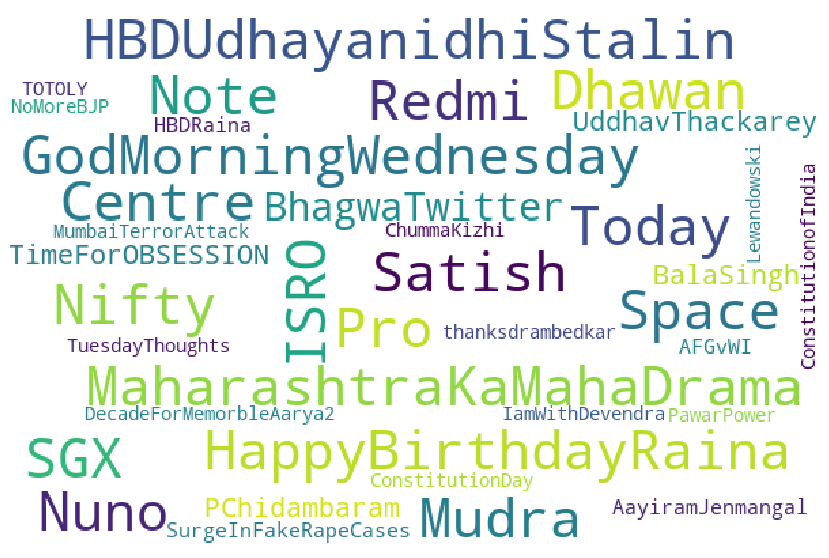

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          width = 600, height = 400,
                          max_words=100,
                          max_font_size=40, 
                          random_state=19
                         ).generate(' '.join(trendsDF['name']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Fetch Tweets for Top Trends

Parameter Initialization

In [0]:
columns = ['Screen_Name', 'Time_Stamp', 'Tweet','Source','UserLocation','GeoLoc','Place']
tweetDF = pd.DataFrame(columns=columns)
num_tweets = 1000

Fetch tweet data

In [0]:
queries=[]
for x in range(0,trendsDF.shape[0],5):
  queryList=[]
  hashTagList=[]
  queryList = trendsDF['name'].tolist()[x:x+5]
  for x in queryList:
    hashTagList.append("%23"+x)
  query = "%20OR%20".join(hashTagList)
  queries.append('('+query+')')
print(len(queries))
queries

7


['(%23HappyBirthdayRaina%20OR%20%23GodMorningWednesday%20OR%20%23ISRO%20OR%20%23HBDUdhayanidhiStalin%20OR%20%23MaharashtraKaMahaDrama)',
 '(%23Satish Dhawan Space Centre%20OR%20%23Mudra%20OR%20%23SGX Nifty%20OR%20%23From Today%20OR%20%23Nuno)',
 '(%23Redmi Note 8 Pro%20OR%20%23BhagwaTwitter%20OR%20%23TimeForOBSESSION%20OR%20%23BalaSingh%20OR%20%23UddhavThackarey)',
 '(%23PChidambaram%20OR%20%23SurgeInFakeRapeCases%20OR%20%23AFGvWI%20OR%20%23HBDRaina%20OR%20%23AayiramJenmangal)',
 '(%23DecadeForMemorbleAarya2%20OR%20%23Lewandowski%20OR%20%23TOTOLY%20OR%20%23PawarPower%20OR%20%23ConstitutionDay)',
 '(%23MumbaiTerrorAttack%20OR%20%23ConstitutionofIndia%20OR%20%23IamWithDevendra%20OR%20%23NoMoreBJP%20OR%20%23thanksdrambedkar)',
 '(%23ChummaKizhi%20OR%20%23TuesdayThoughts)']

In [0]:
ctr=0
for query in queries:
  for tweet in tweepy.Cursor(api.search, q=query, lang="en").items(num_tweets):
    lenDF = len(tweetDF)
    tweetDF.loc[lenDF] = [tweet.user.name,tweet.created_at,tweet.text,tweet.source,tweet.user.location,tweet.coordinates,tweet.place]
    tweetDF.to_csv('tweetDataNew'+str(ctr)+'.csv')
  ctr += 1
print(tweetDF.shape,ctr)
tweetDF.head()

TweepError: ignored

In [0]:
tweetDF.shape

(2633, 7)

In [0]:
tweetDF.head()

,Screen_Name,Time_Stamp,Tweet,Source,UserLocation,GeoLoc,Place
0,Padamya Kumar Pani,2019-11-27 04:27:15,RT @isro: #ISRO #PSLV #Cartosat3 \nLess than 1...,Twitter for Android,Odisha,None,None
1,Prasad Saripilli999,2019-11-27 04:27:14,#CONGRATULATIONS TO #ISRO TEAM PSLV 47 success...,Twitter for Android,"srikakulam,Andhra Pradesh",None,None
2,dhiyaneshjayaraj@gmail.com,2019-11-27 04:27:14,RT @nishna_nithish: He is the first Indian to ...,Twitter for Android,,None,None
3,Abi,2019-11-27 04:27:14,RT @TrendsDhoni: Admit It!.\n\nMost of The MSD...,Twitter for Android,india,None,None
4,M Shiv Shankar 🇮🇳,2019-11-27 04:27:14,"Congratulations @isro, u are the pride of Indi...",Twitter for iPhone,Kharagpur & Bangalore,None,None


In [0]:
tweetDF['GeoLoc'].isnull().value_counts()

True    2633
Name: GeoLoc, dtype: int64

In [0]:
tweetDF['Place'].isnull().value_counts()

True     2615
False      18
Name: Place, dtype: int64

In [0]:
tweetDF['UserLocation'].value_counts()

                    867
India               152
Chennai, India       66
Taraori, India       43
New Delhi, India     40
                   ... 
Washington DC         1
Cochin, India         1
L172.s                1
Lagos                 1
भाटापारा, भारत        1
Name: UserLocation, Length: 543, dtype: int64

In [0]:
tweetDF.drop(['GeoLoc','Place'],axis=1,inplace=True)

In [0]:
tweetDF.drop(['UserLocation'],axis=1,inplace=True)

In [0]:
tweetDF

,Screen_Name,Time_Stamp,Tweet,Source
0,Padamya Kumar Pani,2019-11-27 04:27:15,RT @isro: #ISRO #PSLV #Cartosat3 \nLess than 1...,Twitter for Android
1,Prasad Saripilli999,2019-11-27 04:27:14,#CONGRATULATIONS TO #ISRO TEAM PSLV 47 success...,Twitter for Android
2,dhiyaneshjayaraj@gmail.com,2019-11-27 04:27:14,RT @nishna_nithish: He is the first Indian to ...,Twitter for Android
3,Abi,2019-11-27 04:27:14,RT @TrendsDhoni: Admit It!.\n\nMost of The MSD...,Twitter for Android
4,M Shiv Shankar 🇮🇳,2019-11-27 04:27:14,"Congratulations @isro, u are the pride of Indi...",Twitter for iPhone
...,...,...,...,...
2628,Luopean,2019-11-27 04:04:28,RT @888sport: 2-0 down to 4-2 up...\n\nJose Mo...,Twitter for Android
2629,Prabha Choudhury,2019-11-27 04:04:27,RT @PIB_India: If I had to describe the #Const...,Twitter for Android
2630,shashi kumar,2019-11-27 04:04:25,"RT @GoI_MeitY: ""#ConstititionOfIndia is one th...",Twitter for Android
2631,Luopean,2019-11-27 04:04:25,RT @apointofme: Tottenham to win the champions...,Twitter for Android


In [0]:
tweetDF['Source'].value_counts()

Twitter for Android              2155
Twitter Web App                   264
Twitter for iPhone                134
Twitter for iPad                   34
TweetDeck                           9
Twitter Web Client                  5
Buffer                              5
WordPress.com                       4
Hootsuite Inc.                      3
CricketNDTVLive                     3
Flamingo for Android                3
IFTTT                               2
ICC Live Scores                     2
Salesforce - Social Studio          1
Instagram                           1
Paper.li                            1
Devdiscourse News Desk              1
CW Live Cricket Scores              1
 IndiaTodayFLASH                    1
cricwaves-scores                    1
Mobile Web (M2)                     1
Twitcher_jtn                        1
Pranjal Rai - Yuva Seva Sangh       1
Name: Source, dtype: int64

<BarContainer object of 23 artists>

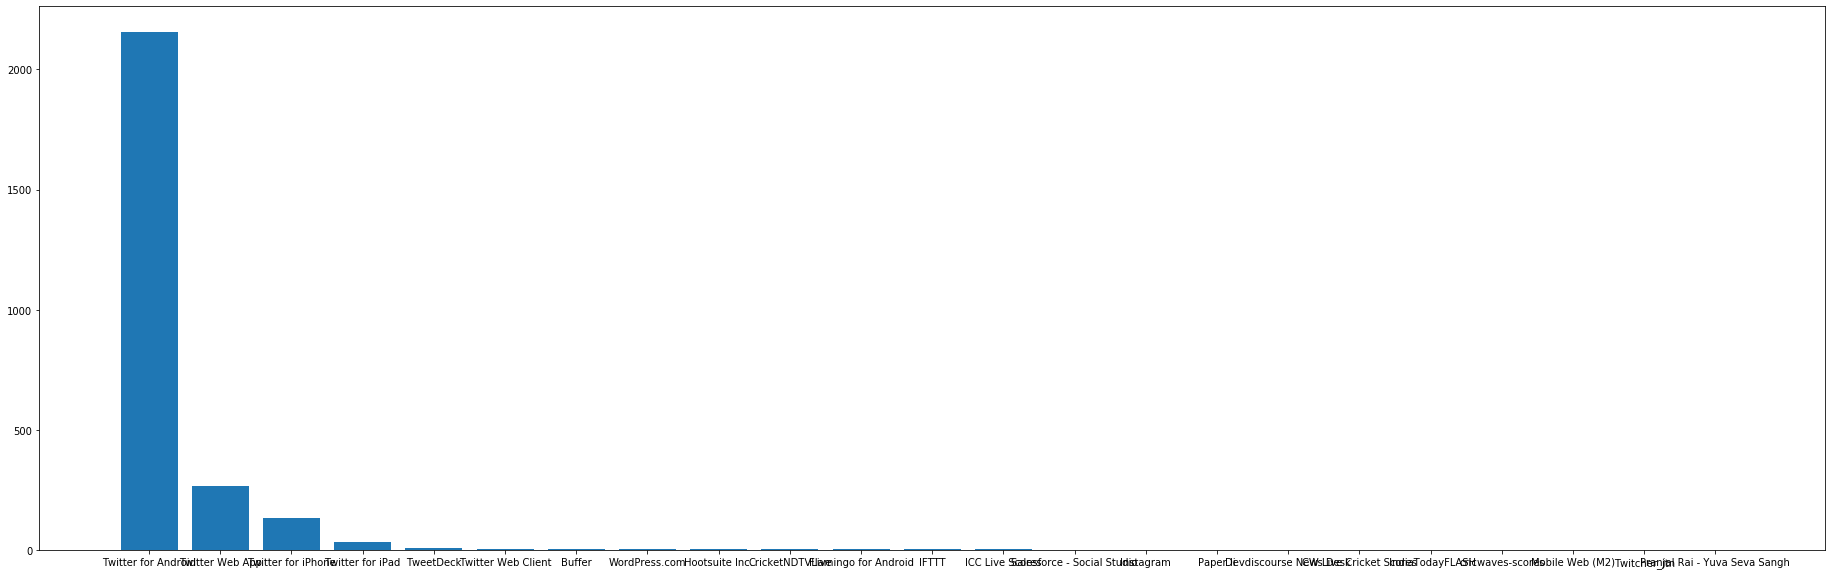

In [0]:
plt.figure(figsize=(32,10))
plt.bar(tweetDF['Source'].value_counts().index,tweetDF['Source'].value_counts())

## Tweet Analysis

Basic Data Cleaning

In [0]:
tweetDF.head()

,Screen_Name,Time_Stamp,Tweet,Source
0,Padamya Kumar Pani,2019-11-27 04:27:15,RT @isro: #ISRO #PSLV #Cartosat3 \nLess than 1...,Twitter for Android
1,Prasad Saripilli999,2019-11-27 04:27:14,#CONGRATULATIONS TO #ISRO TEAM PSLV 47 success...,Twitter for Android
2,dhiyaneshjayaraj@gmail.com,2019-11-27 04:27:14,RT @nishna_nithish: He is the first Indian to ...,Twitter for Android
3,Abi,2019-11-27 04:27:14,RT @TrendsDhoni: Admit It!.\n\nMost of The MSD...,Twitter for Android
4,M Shiv Shankar 🇮🇳,2019-11-27 04:27:14,"Congratulations @isro, u are the pride of Indi...",Twitter for iPhone


In [0]:
tweetTextDF = tweetDF.drop(['Screen_Name','Time_Stamp','Source'],axis=1)

In [0]:
tweetTextDF.head()

,Tweet
0,RT @isro: #ISRO #PSLV #Cartosat3 \nLess than 1...
1,#CONGRATULATIONS TO #ISRO TEAM PSLV 47 success...
2,RT @nishna_nithish: He is the first Indian to ...
3,RT @TrendsDhoni: Admit It!.\n\nMost of The MSD...
4,"Congratulations @isro, u are the pride of Indi..."


In [0]:
tweetTextDF['Tweet'][0].split()

['RT',
 '@isro:',
 '#ISRO',
 '#PSLV',
 '#Cartosat3',
 'Less',
 'than',
 '1',
 'hours',
 'to',
 'go',
 '!',
 'Watch',
 'the',
 'live',
 'telecast',
 'from',
 '9',
 'AM',
 'IST',
 'on',
 'our',
 'website',
 'https://t.co/lhKerjeiNn…']

In [0]:
def PreProcessBasic(t):
  tList = t.split()
  if 'RT' in tList:
    tList.remove('RT')
  for item in tList:
    if item[0]=='@':
      tList.remove(item)  
  return ' '.join(tList)

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(PreProcessBasic)
tweetTextDF.head()

,Tweet
0,#ISRO #PSLV #Cartosat3 Less than 1 hours to go...
1,#CONGRATULATIONS TO #ISRO TEAM PSLV 47 success...
2,He is the first Indian to score centuries in a...
3,Admit It!. Most of The MSDian's Second Favouri...
4,Congratulations u are the pride of India #PSLV...


In [0]:
#tweetTextDF['Tweet'] = tweetTextDF['Tweet'].str.lower()
#tweetTextDF.head()

In [0]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(remove_urls)

In [0]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(remove_punctuation)
tweetTextDF.head()

,Tweet
0,ISRO PSLV Cartosat3 Less than 1 hours to go W...
1,CONGRATULATIONS TO ISRO TEAM PSLV 47 successfully
2,He is the first Indian to score centuries in a...
3,Admit It Most of The MSDians Second Favourite ...
4,Congratulations u are the pride of India PSLVC...


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [0]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(remove_stopwords)
tweetTextDF['Tweet'].head()

0    ISRO PSLV Cartosat3 Less 1 hours go Watch live...
1    CONGRATULATIONS TO ISRO TEAM PSLV 47 successfully
2    He first Indian score centuries three formats ...
3    Admit It Most The MSDians Second Favourite Pla...
4           Congratulations u pride India PSLVC47 ISRO
Name: Tweet, dtype: object

Most frequent words

In [0]:
from collections import Counter
cnt = Counter()
for text in tweetTextDF['Tweet'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('HappyBirthdayRaina', 456),
 ('Happy', 338),
 ('GodMorningWednesday', 275),
 ('SurgeInFakeRapeCases', 247),
 ('ConstitutionDay', 220),
 ('women', 202),
 ('Birthday', 201),
 ('ChinnaThala', 194),
 ('laws', 188),
 ('today', 178)]

Rare Words

In [0]:
cnt.most_common()[:-10:-1]

[('🎶…', 1),
 ('Heard', 1),
 ('TOTOL…', 1),
 ('COMEBACK', 1),
 ('COMPLETE', 1),
 ('SPURS', 1),
 ('dignity', 1),
 ('protects', 1),
 ('efficiently', 1)]

### EMOTICON LIBRARY

In [0]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

### Converting Emojis and Emoticon into words

In [0]:
def convert_emoticons(text):
  for emot in EMOTICONS:
      text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
  return text

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(convert_emoticons)

In [0]:
pip install emojis

In [0]:
import emojis

In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(lambda x: emojis.decode(x))

In [0]:
tweetTextDF[tweetTextDF['Tweet'].str.find(':')!=-1]

,Tweet
3,Admit It Most The MSDians Second Favourite Pla...
12,Happy birthday brother :birthday: god bless wi...
13,look swag :heart_eyes::heart_eyes::see_no_evil...
15,Favourite duo amp fans :star_struck::heart: Re...
18,GodMorningWednesday GodMorningMeatEaters Stop ...
...,...
2611,:five: goals :nine: minutes :fire: OnThisDay :...
2618,A Mauricio Pochettino banner bears Jose Mourin...
2620,Well done ball boy :joy: totoly totvsoly Totte...
2627,Plz check tag tweeting DecadeForMemorableAarya...


In [0]:
tweetTextDF['Tweet'] = tweetTextDF['Tweet'].apply(lambda x: x.replace(':',' '))

In [0]:
tweetTextDF[tweetTextDF['Tweet'].str.find(':')!=-1]

,Tweet


In [0]:
tweetTextDF.head()

,Tweet
0,ISRO PSLV Cartosat3 Less 1 hours go Watch live...
1,CONGRATULATIONS TO ISRO TEAM PSLV 47 successfully
2,He first Indian score centuries three formats ...
3,Admit It Most The MSDians Second Favourite Pla...
4,Congratulations u pride India PSLVC47 ISRO


## Vectorization

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(tweetTextDF['Tweet'])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [0]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Sentiment Analysis

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sentiAnalyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


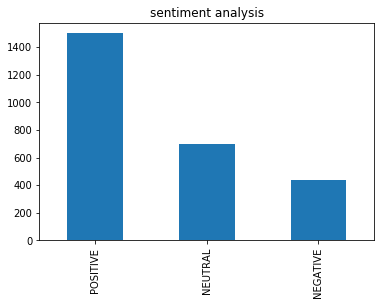

In [0]:
tweetTextDF['sentiment_compound_polarity']=tweetTextDF['Tweet'].apply(lambda x:sentiAnalyzer.polarity_scores(x)['compound'])
tweetTextDF['sentiment_neutral']=tweetTextDF['Tweet'].apply(lambda x:sentiAnalyzer.polarity_scores(x)['neu'])
tweetTextDF['sentiment_negative']=tweetTextDF['Tweet'].apply(lambda x:sentiAnalyzer.polarity_scores(x)['neg'])
tweetTextDF['sentiment_pos']=tweetTextDF['Tweet'].apply(lambda x:sentiAnalyzer.polarity_scores(x)['pos'])
tweetTextDF['sentiment_type']=''
tweetTextDF.loc[tweetTextDF.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweetTextDF.loc[tweetTextDF.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweetTextDF.loc[tweetTextDF.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweetTextDF.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

## K-Means

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [0]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 6
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 constitutionday
 india
 isro
 constitution
 cartosat3
 pslvc47
 totoly
 the
 rape
 fire

Cluster 1:
 godmorningwednesday
 god
 watch
 dancing
 movies
 must
 point_down
 singing
 vulgar
 sing

Cluster 2:
 measure
 defined
 safety
 due
 misuse
 made
 laws
 women
 today
 for

Cluster 3:
 birthday
 happybirthdayraina
 happy
 sureshraina
 hbdraina
 wishing
 gift
 chinnathala
 cricketer
 thalapathy

Cluster 4:
 happy
 fieldwaiting
 strong
 missing
 comeback
 sunglasses
 heart_eyes
 all
 chinnathala
 wishing

Cluster 5:
 surgeinfakerapecases
 because
 men
 specially
 saints
 morality
 100s
 decaying
 clearly
 proves



In [0]:
twss=[]
sa=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(vz)
    Ypreds=kmeans.predict(vz)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(vz, Ypreds))

Text(0, 0.5, 'Total within-cluster sum of squares')

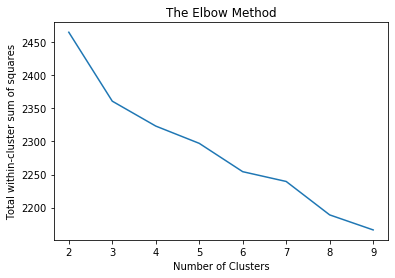

In [0]:
plt.plot(range(2,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

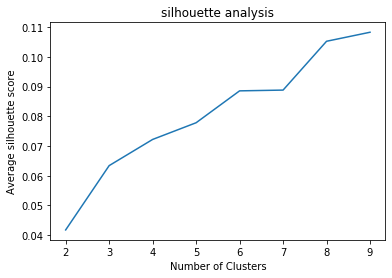

In [0]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.04174534500506136


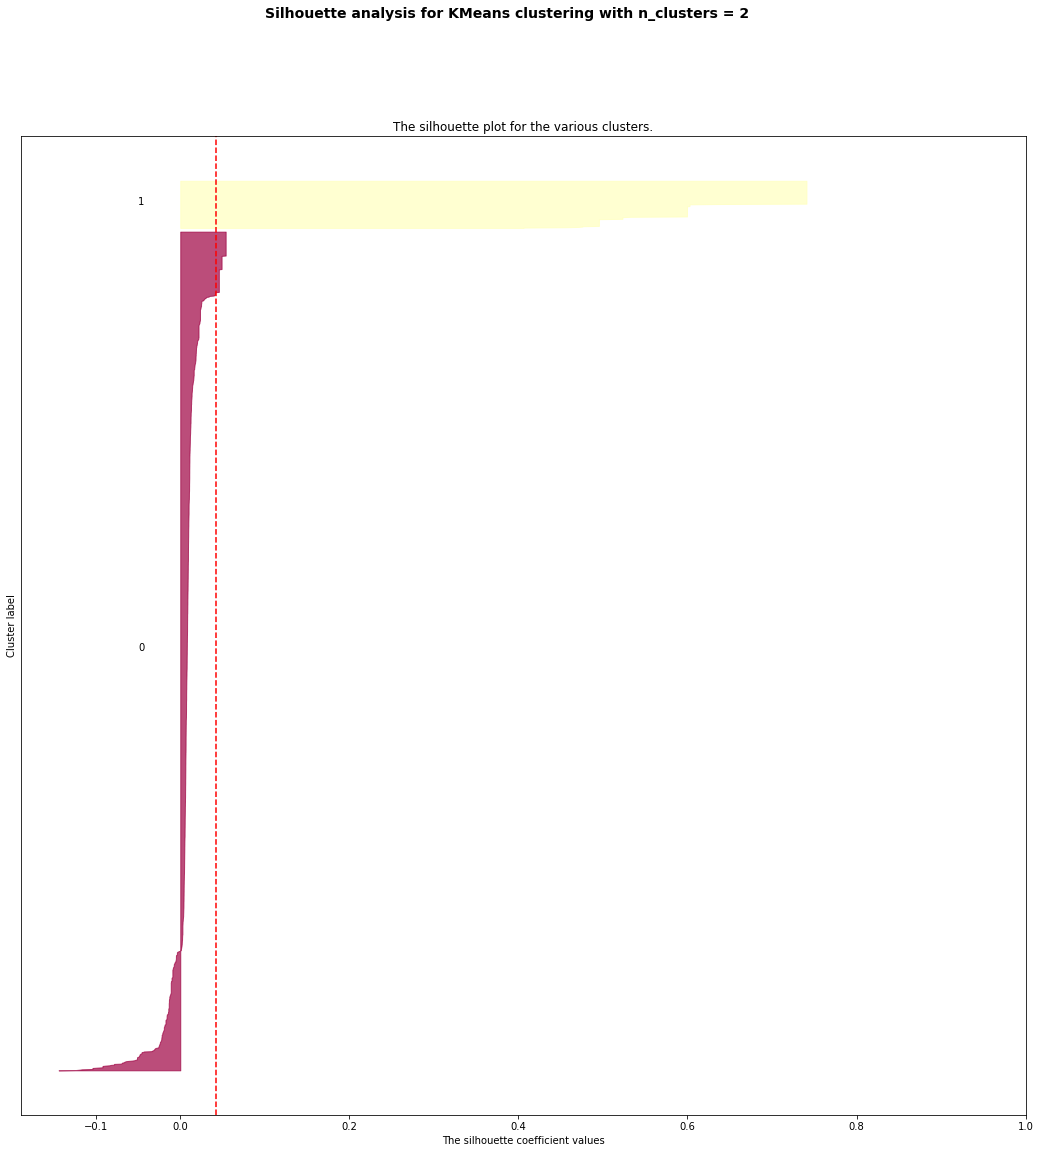

<Figure size 2304x720 with 0 Axes>

For n_clusters = 3 The average silhouette_score is : 0.06339220286655221


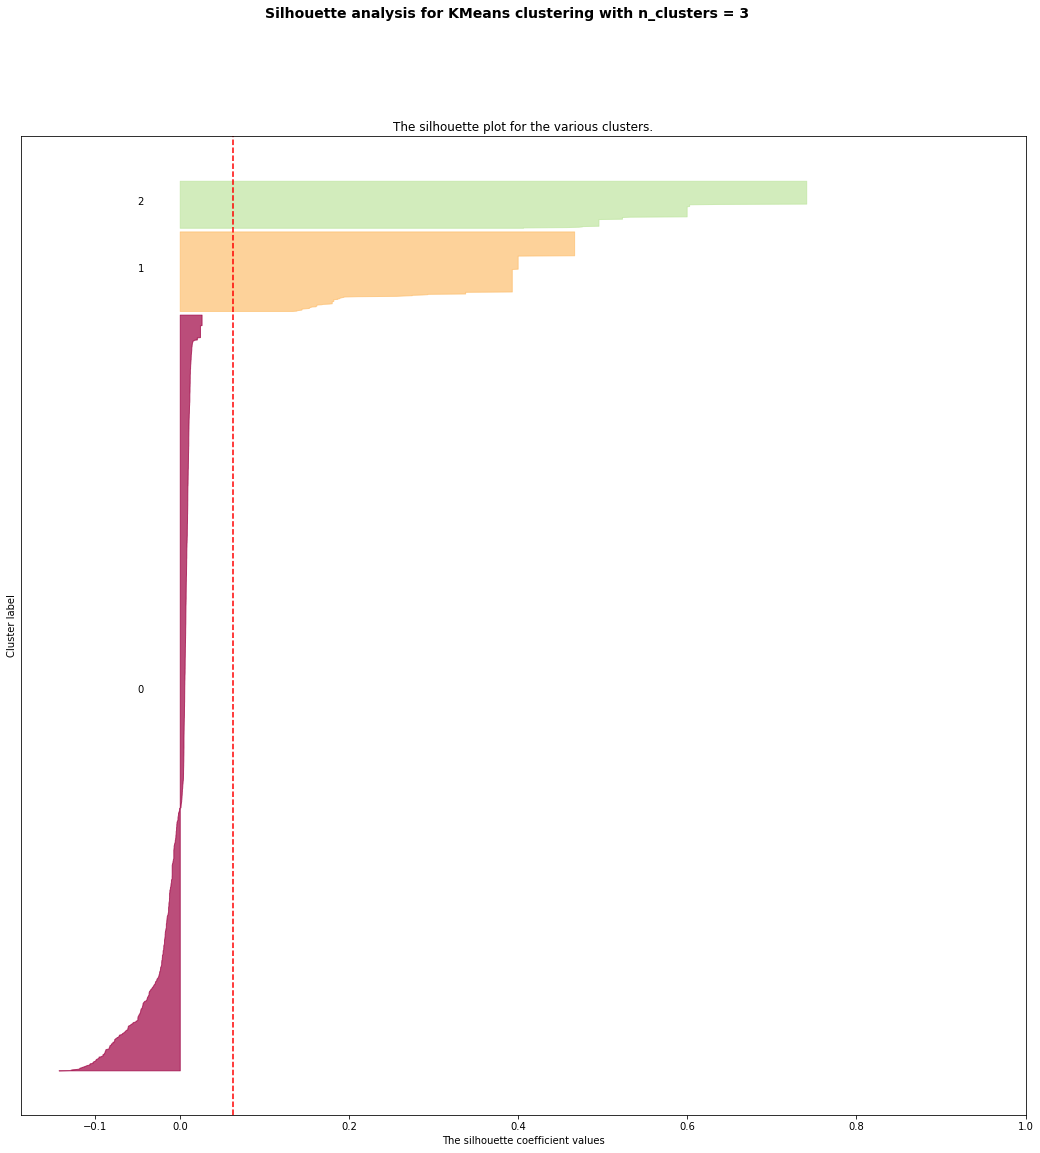

<Figure size 2304x720 with 0 Axes>

For n_clusters = 4 The average silhouette_score is : 0.07138050000637672


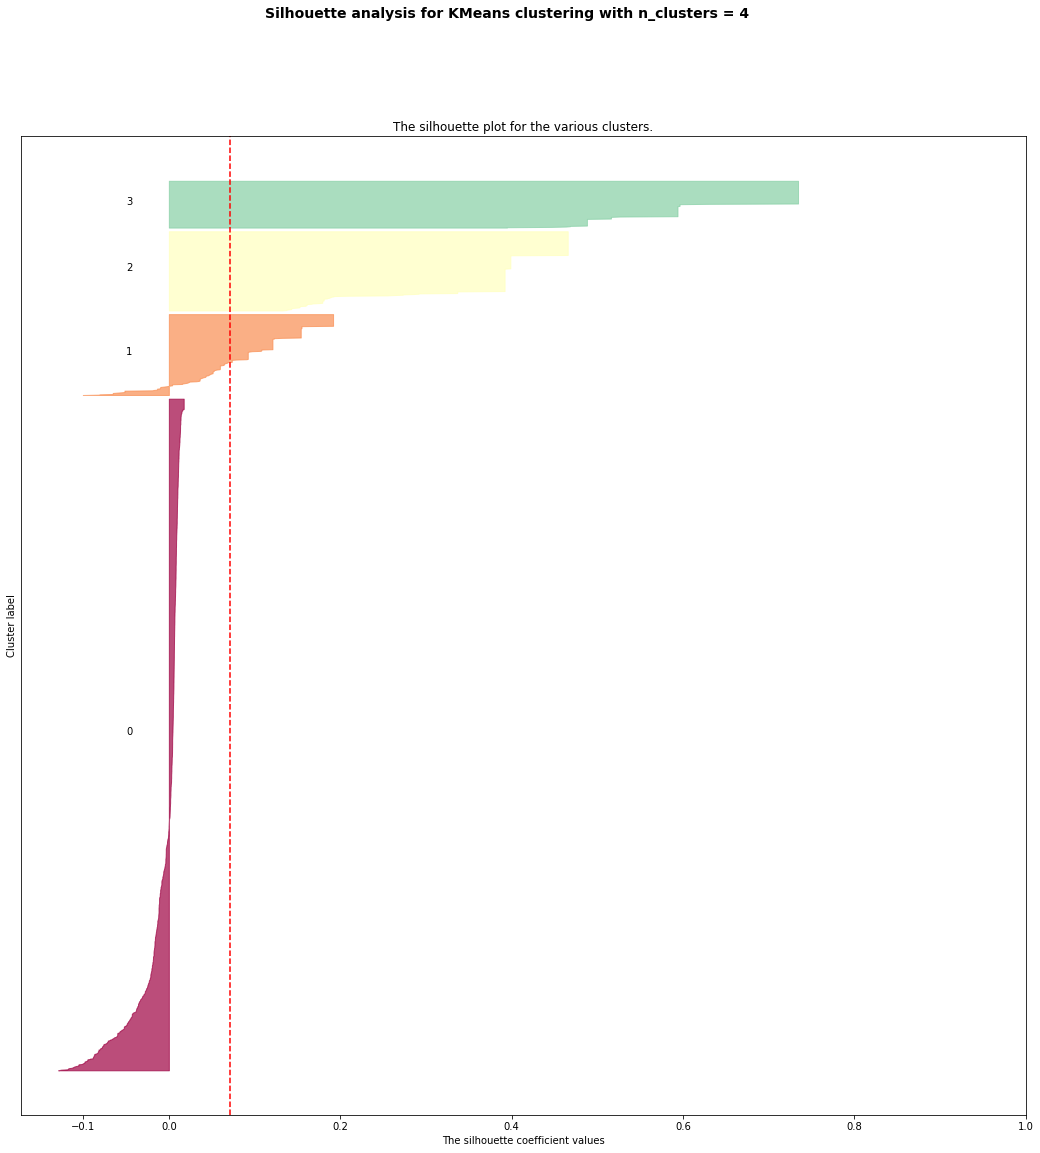

<Figure size 2304x720 with 0 Axes>

For n_clusters = 5 The average silhouette_score is : 0.08545996092625927


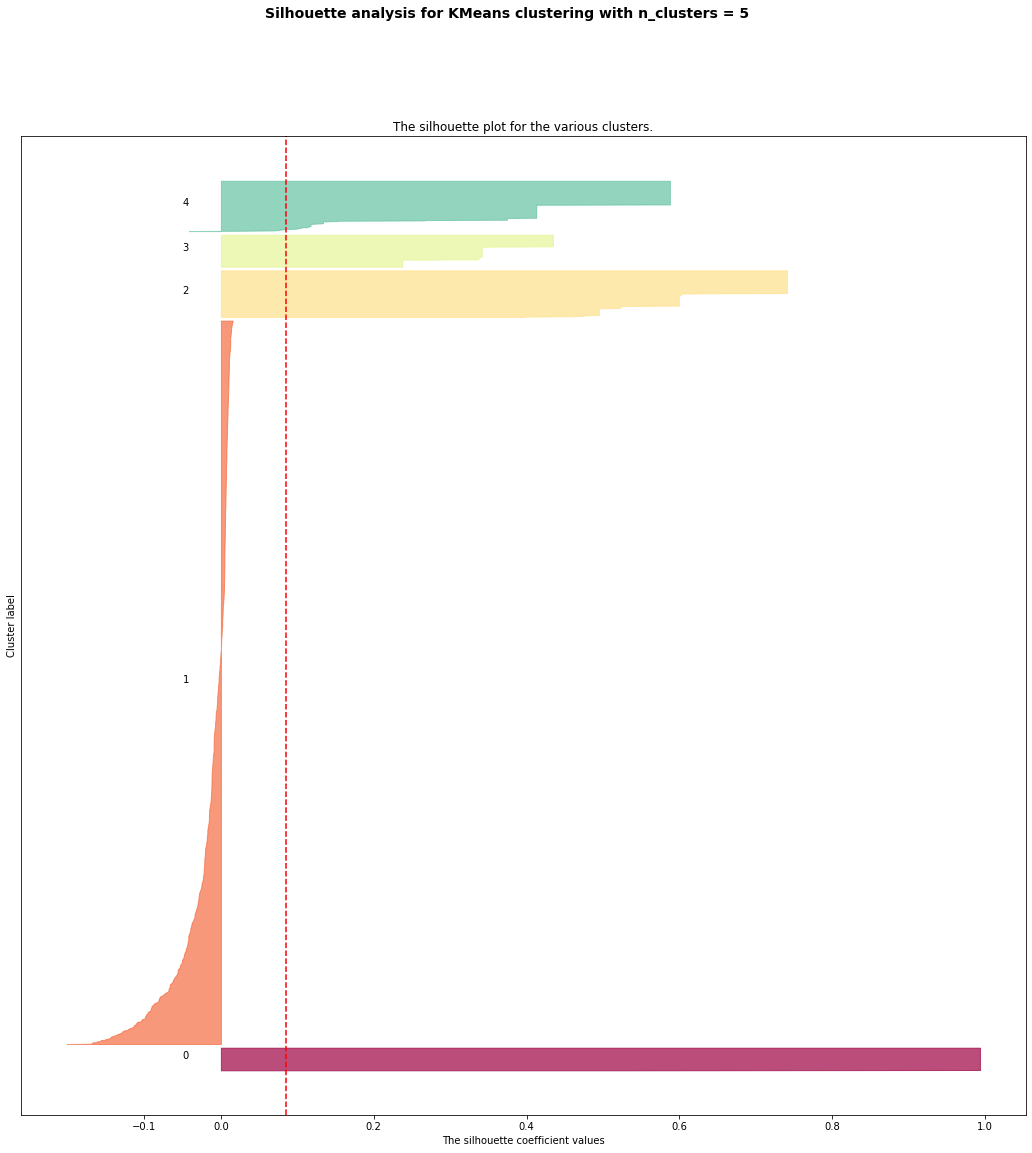

<Figure size 2304x720 with 0 Axes>

For n_clusters = 6 The average silhouette_score is : 0.08614230038643304


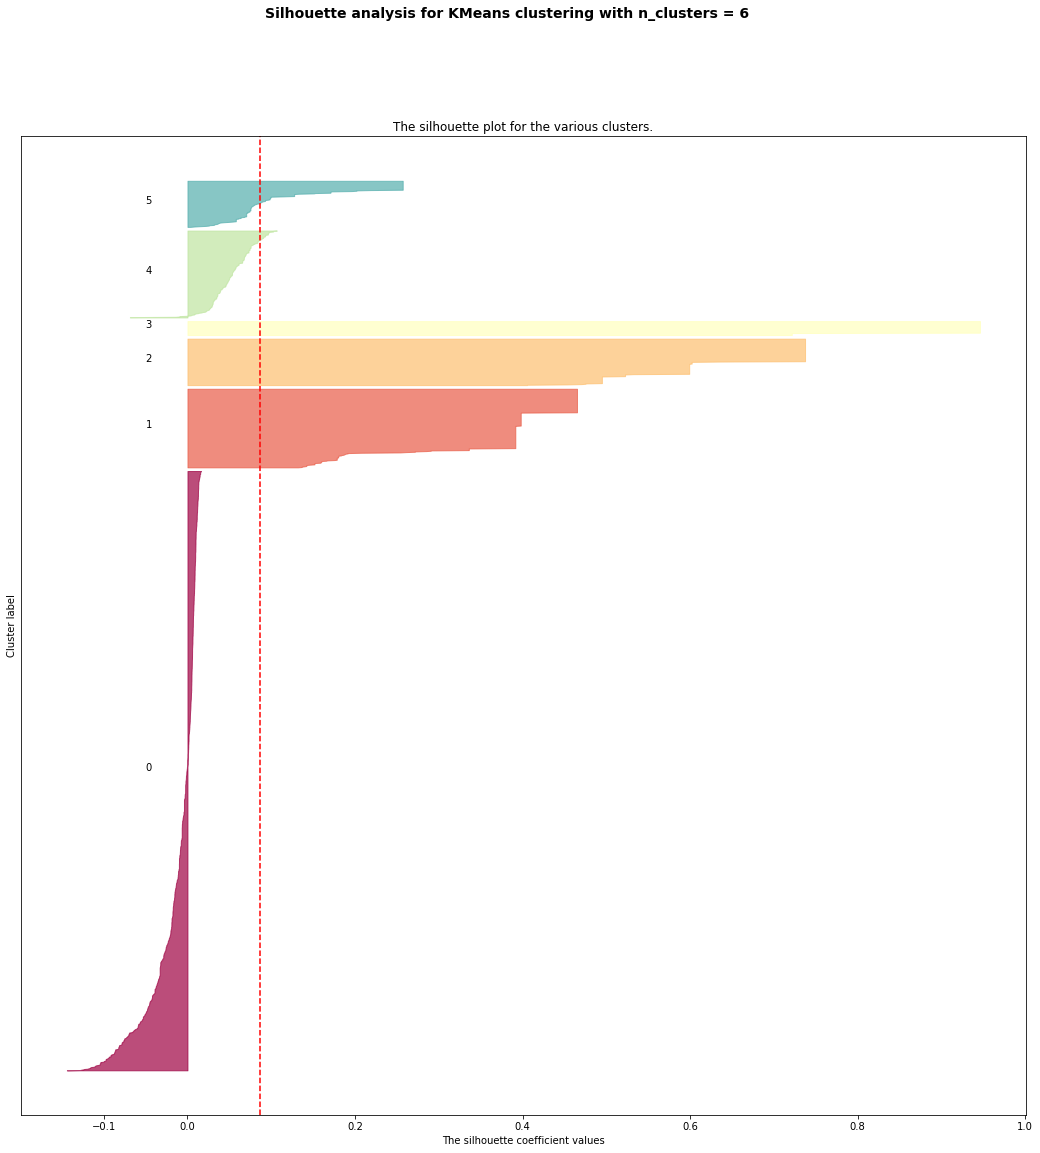

<Figure size 2304x720 with 0 Axes>

For n_clusters = 7 The average silhouette_score is : 0.09894781888007671


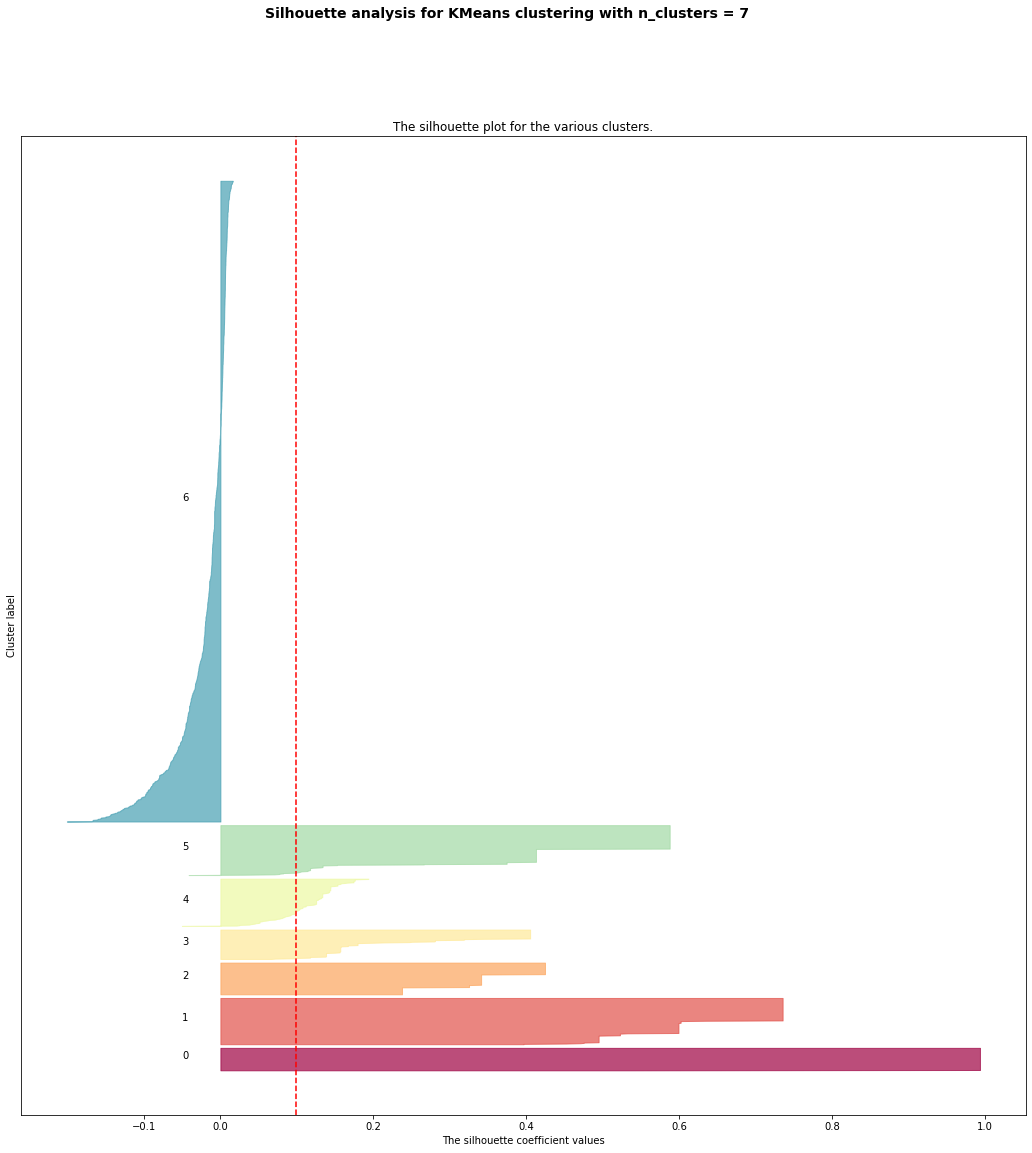

<Figure size 2304x720 with 0 Axes>

For n_clusters = 8 The average silhouette_score is : 0.10032602643091461


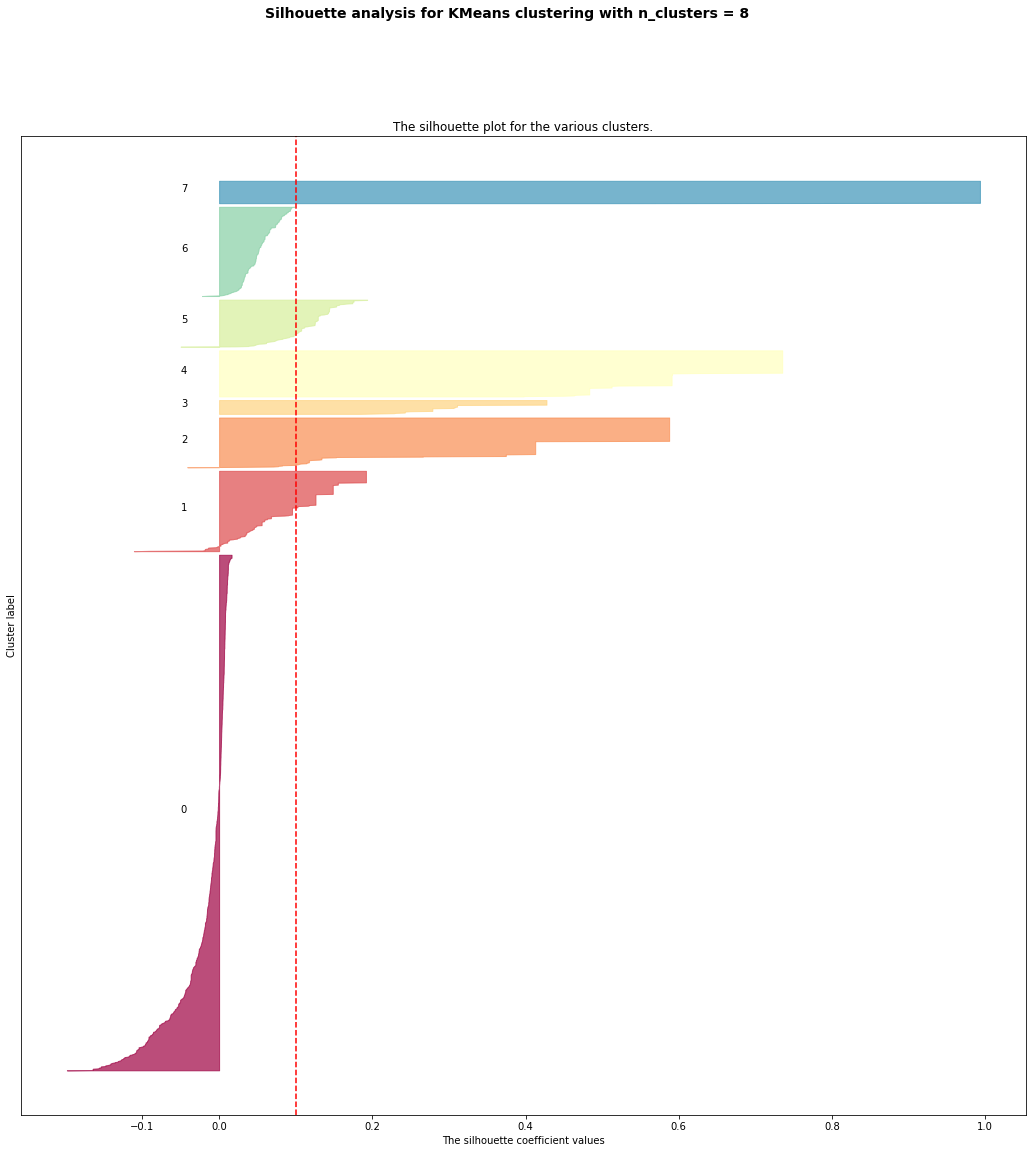

<Figure size 2304x720 with 0 Axes>

For n_clusters = 9 The average silhouette_score is : 0.10569191429184166


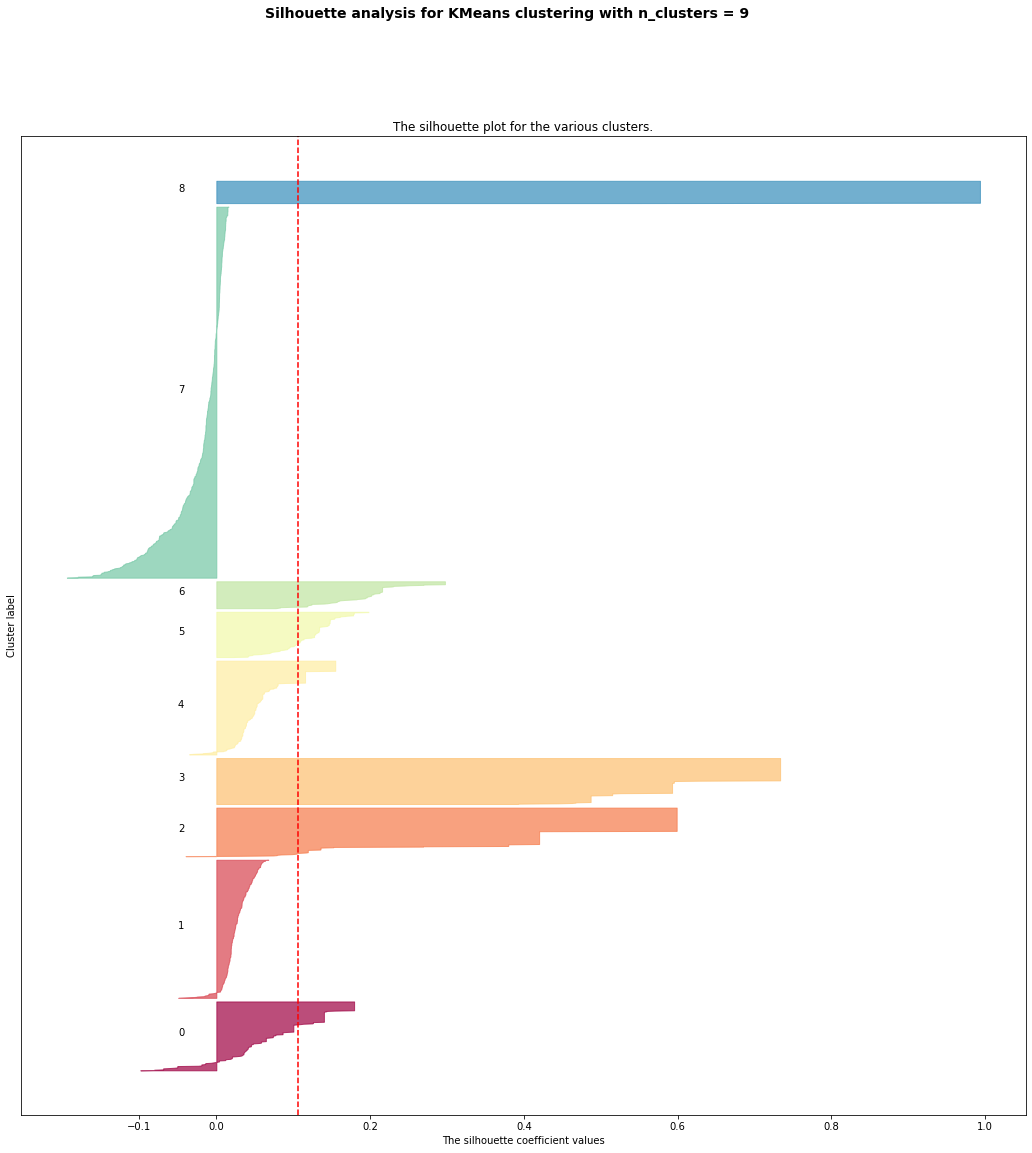

<Figure size 2304x720 with 0 Axes>

In [0]:
cmap = cm.get_cmap("Spectral")
for n_clusters in range(2,10):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18,18)


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(vz)
    silhouette_avg = silhouette_score(vz, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(vz, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.figure(figsize=(32,10))
    plt.show()